In [9]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
stock = 'AAPL'
data = pd.DataFrame()
data[stock] = wb.DataReader(stock, data_source = 'yahoo', start = '2010-1-1')['Adj Close']
data.head()

,AAPL
Date,
2010-01-04,26.538483
2010-01-05,26.584366
2010-01-06,26.161509
2010-01-07,26.113146
2010-01-08,26.286753


In [3]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,AAPL
Date,
2010-01-04,NaN
2010-01-05,0.001727
2010-01-06,-0.016034
2010-01-07,-0.001850
2010-01-08,0.006626


In [4]:
current_price = data.iloc[-1]
current_price

AAPL    244.929993
Name: 2020-04-02 00:00:00, dtype: float64

In [5]:
mean = np.mean(log_returns)
stdev = np.std(log_returns)

mean, stdev 

(AAPL    0.000862
 dtype: float64,
 AAPL    0.017327
 dtype: float64)

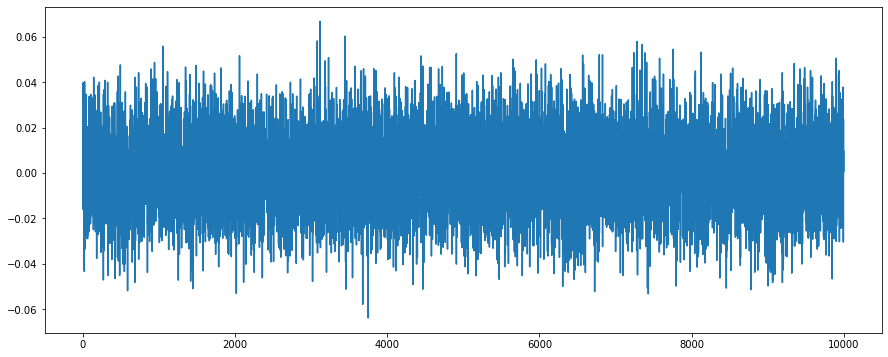

In [12]:
np.random.seed(0)
iterations = 10000

sim_returns = np.random.normal(mean, stdev, iterations)

plt.figure(figsize = (15,6))
plt.plot(sim_returns)
plt.show()


In [13]:
SimVar = current_price * np.percentile(sim_returns, 5)

print('Simulated VAR is {}'.format(SimVar))

Simulated VAR is AAPL   -6.716877
Name: 2020-04-02 00:00:00, dtype: float64
